In [95]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib as plt

In [96]:
df = pd.read_csv('Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [97]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [98]:
df.info()
##Excercise(Visualization)
#What is the distribution of Loan approval status across different credit scores?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [99]:
cat = df.select_dtypes(include=['object','category'])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in cat:
    df[x]= encoder.fit_transform(df[x])
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,0,45,39948,617,0,4,22,13152,48,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,1,38,39709,628,0,0,15,26045,48,2,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2,47,40724,570,0,1,26,17627,36,1,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,3,58,69084,545,0,3,34,37898,96,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,4,37,103264,594,0,0,17,9184,36,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [100]:
x = df.drop(['ApplicationDate', 'LoanApproved'], axis = 1)
y = df['LoanApproved']
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2)

In [101]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='newton-cholesky')
model1.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cholesky')

In [102]:
pred1 = model1.predict(xtest)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score,recall_score, f1_score,accuracy_score
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3072
           1       0.99      0.99      0.99       928

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [104]:
print(confusion_matrix(ytest,pred1))

[[3067    5]
 [   5  923]]


In [105]:
##Excercise
#What is the distribution of LoanApproval status across different CreditScore
df2 = df.groupby(['CreditScore','LoanApproved']).apply('sum', numeric_only=True)
df2.reset_index(inplace=True)
df2
##Using Bar chat to show the distributions of the creditscore and loanapproved.
 

,CreditScore,LoanApproved,ApplicationDate,Age,AnnualIncome,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,343,0,6102,26,34398,2,0,1,9791,48,...,21460,2866.500000,0.769516,6,13925,0.333291,0.356732,385.560721,0.318005,59.0
1,362,0,8051,25,29504,0,3,1,15320,120,...,13147,2458.666667,0.854778,3,24599,0.389320,0.402834,524.256881,0.340126,53.0
2,372,0,12394,31,53358,0,3,13,32177,72,...,30199,4446.500000,0.659187,10,61610,0.361177,0.387164,1155.606646,0.315890,49.0
3,380,0,325,25,62204,0,3,1,14467,120,...,14663,5183.666667,0.699325,9,189158,0.379467,0.419029,513.526551,0.145944,54.0
4,381,0,4267,18,30794,1,2,0,19868,48,...,3448,2566.166667,0.817594,4,260304,0.324368,0.345923,769.394246,0.447124,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,702,1,14029,57,132636,0,2,37,14967,36,...,11006,11053.000000,0.964156,3,3044,0.148967,0.151846,520.189691,0.075562,40.0
588,703,0,6861,62,57059,0,2,38,17915,84,...,167788,4754.916667,0.735682,7,97545,0.191415,0.220702,420.452702,0.177385,56.0
589,703,1,8095,71,99091,0,4,48,16878,48,...,2407,8257.583333,0.890836,5,576319,0.160378,0.140867,461.951004,0.092031,32.0
590,707,1,8660,67,90522,0,4,43,13555,24,...,42101,7543.500000,0.754776,9,5618,0.135055,0.155602,660.850084,0.124458,32.8


In [106]:
fig = px.bar(df2, x = 'LoanApproved',y = 'CreditScore', text='CreditScore', color='LoanApproved', title='Distribution Of Loan Approval Status Across Different Credit Score')
fig.show()

In [107]:
## How does Age correlate with Annual income and Loan Amount?
df = df.groupby(['AnnualIncome','LoanAmount']).apply('sum', numeric_only=True)
df.reset_index(inplace=True)
df



,AnnualIncome,LoanAmount,ApplicationDate,Age,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,15000,4698,975,18,510,0,0,0,36,2,...,1250.000000,0.932363,4,22256,0.234698,0.223670,180.311831,0.257849,0,56.0
1,15000,5549,6597,32,542,0,3,12,48,2,...,1250.000000,0.433637,3,283344,0.229549,0.196420,167.801460,0.508641,0,48.0
2,15000,5936,336,30,498,0,3,8,60,0,...,1250.000000,0.802070,4,163061,0.261936,0.250039,174.243179,0.377795,0,55.0
3,15000,6242,11260,33,507,0,4,12,12,0,...,1250.000000,0.833289,2,20029,0.217742,0.178679,571.874252,0.538299,0,54.0
4,15000,6316,19810,63,603,0,3,42,48,0,...,1250.000000,0.490932,7,129162,0.199816,0.231694,203.023712,0.565619,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,333715,32528,4374,51,506,0,1,32,48,1,...,15052.916667,0.660037,4,146735,0.274528,0.329434,1227.537320,0.105132,1,36.8
19991,335901,37774,14448,41,630,0,4,18,48,0,...,16510.083333,0.771708,7,81530,0.217774,0.226137,1202.731484,0.097742,1,39.2
19992,373724,13107,2735,33,639,0,2,11,96,1,...,17111.833333,0.556760,7,23093,0.228607,0.221695,292.622906,0.037379,1,40.0
19993,422480,50214,1499,47,518,0,4,27,84,0,...,17952.583333,0.632132,2,45451,0.316214,0.257883,1296.417456,0.094327,1,39.2


<Axes: >

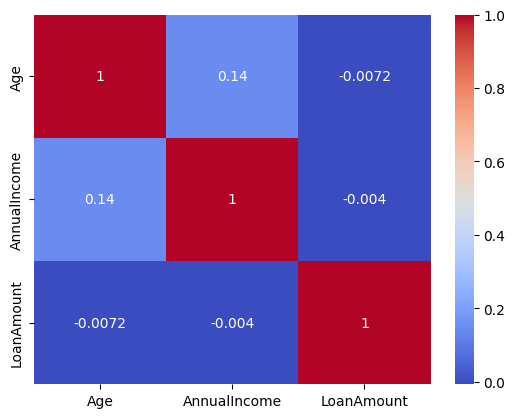

In [108]:

sns.heatmap(df[['Age','AnnualIncome','LoanAmount']].corr(),annot=True,cmap='coolwarm')

In [109]:
#What is the Relationship between monthly-debt-payment and dept-to-income ratio for different loan purpose
fig = px.scatter(df, x = 'LoanPurpose',y='MonthlyDebtPayments', color = 'DebtToIncomeRatio')
fig.show()


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AnnualIncome                19995 non-null  int64  
 1   LoanAmount                  19995 non-null  int64  
 2   ApplicationDate             19995 non-null  int64  
 3   Age                         19995 non-null  int64  
 4   CreditScore                 19995 non-null  int64  
 5   EmploymentStatus            19995 non-null  int64  
 6   EducationLevel              19995 non-null  int64  
 7   Experience                  19995 non-null  int64  
 8   LoanDuration                19995 non-null  int64  
 9   MaritalStatus               19995 non-null  int64  
 10  NumberOfDependents          19995 non-null  int64  
 11  HomeOwnershipStatus         19995 non-null  int64  
 12  MonthlyDebtPayments         19995 non-null  int64  
 13  CreditCardUtilizationRate   199

In [111]:
df = df.groupby(['CreditScore','LoanDuration']).apply('sum', numeric_only=True)
df.reset_index(inplace=True)
df

,CreditScore,LoanDuration,AnnualIncome,LoanAmount,ApplicationDate,Age,EmploymentStatus,EducationLevel,Experience,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,343,48,34398,9791,6102,26,2,0,1,1,...,2866.500000,0.769516,6,13925,0.333291,0.356732,385.560721,0.318005,0,59.0
1,362,120,29504,15320,8051,25,0,3,1,1,...,2458.666667,0.854778,3,24599,0.389320,0.402834,524.256881,0.340126,0,53.0
2,372,72,53358,32177,12394,31,0,3,13,2,...,4446.500000,0.659187,10,61610,0.361177,0.387164,1155.606646,0.315890,0,49.0
3,380,120,62204,14467,325,25,0,3,1,1,...,5183.666667,0.699325,9,189158,0.379467,0.419029,513.526551,0.145944,0,54.0
4,381,48,30794,19868,4267,18,1,2,0,1,...,2566.166667,0.817594,4,260304,0.324368,0.345923,769.394246,0.447124,0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,914,120,15000,64695,22453,57,0,4,17,3,...,2500.000000,1.881436,10,371754,0.682390,0.709718,5051.382137,5.290706,0,101.0
2377,997,72,15000,17540,12937,58,0,1,12,3,...,2500.000000,1.422674,11,99992,0.506580,0.510111,1404.427963,2.029942,0,115.0
2378,1022,84,15000,17267,17199,74,0,0,28,2,...,2500.000000,1.387620,9,31430,0.503534,0.503899,1263.722914,1.533378,0,111.0
2379,1093,132,15000,28045,20536,62,0,3,19,2,...,2500.000000,1.690561,9,15975,0.529590,0.501426,1814.210963,2.288969,0,113.0


In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 592 non-null    int64  
 1   LoanApproved                592 non-null    int64  
 2   ApplicationDate             592 non-null    int64  
 3   Age                         592 non-null    int64  
 4   AnnualIncome                592 non-null    int64  
 5   EmploymentStatus            592 non-null    int64  
 6   EducationLevel              592 non-null    int64  
 7   Experience                  592 non-null    int64  
 8   LoanAmount                  592 non-null    int64  
 9   LoanDuration                592 non-null    int64  
 10  MaritalStatus               592 non-null    int64  
 11  NumberOfDependents          592 non-null    int64  
 12  HomeOwnershipStatus         592 non-null    int64  
 13  MonthlyDebtPayments         592 non

In [116]:
fig = px.bar(df, x = 'EmploymentStatus',y='CreditScore', color = 'LoanDuration',barmode='group')
fig.show()
